#<h1 style="text-align: center;">Submarine: Mine or Rock</h1>


Notebook made by: __Hayder CHAKROUN__

E-mail: __hayderchakroun5@gmail.com__



<h2>Scope</h2>
This project is about predicting wether an object is a Rock or a Metal-made object.
Use Case: Submarines use it to identify wether an object scanned through sonar radiations, is a mine or simply a harmless rock.

-----------------------------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [2]:
import numpy as np #array manipulation and maths
import pandas as pd #dataframe manipulation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #our desired model
from sklearn.metrics import accuracy_score

In [12]:
path='/content/drive/MyDrive/Projects/Machine Learning projects/Submarine: Mine or Rock - Logistic Regression/sonar data.csv'
data=pd.read_csv(path, header=None)

In [13]:
#take a look at our data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


notice that all columns are float variable, while the last column is a categorical variable( R= Rock, M= Mine).It's our target feature.

Checking out the number of instances of each category

In [16]:
data[60].value_counts()

,count
60,
M,111
R,97


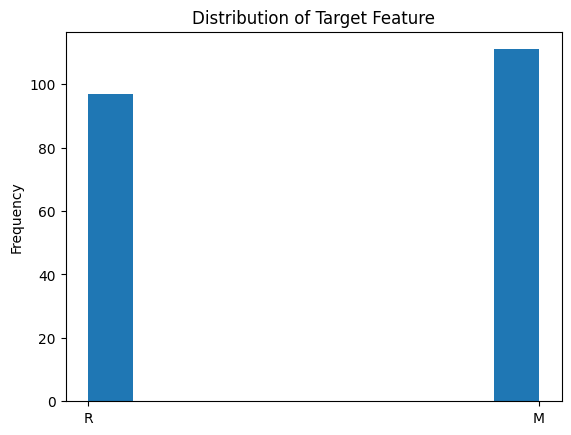

In [44]:

plt.hist(last_feature)
plt.ylabel("Frequency")
plt.title("Distribution of Target Feature")
plt.show()

Checking out if data needs to be shuffled

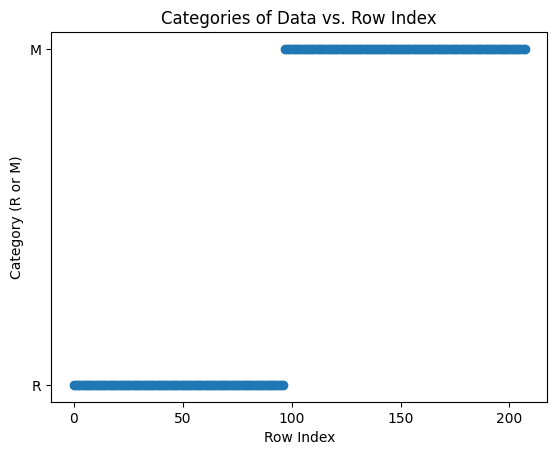

In [43]:
plt.scatter(data.index, data.iloc[:, 60])
plt.xlabel("Row Index")
plt.ylabel("Category (R or M)")
plt.title("Categories of Data vs. Row Index")
plt.show()

our data indeed appears to need shuffling before being split and fed to the model
=> we will be using stratify on our target label

let us first seperate our training features and our target feature

In [29]:
X=data.drop(columns=60, axis=1)
y=data[60]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [30]:
y.head()

,60
0,R
1,R
2,R
3,R
4,R


now will split our training and test data, and of course, we will use stratify based on our target data, so that the proportion of both classes (R and M) are the same for training and test data

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1,stratify=y,random_state=1)

#Model Selection


we opt for logistic regression as it is good for binary classification, such as the case here.

In [34]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Testing the model on the training data might give us a hint on over-fitting to see if we need to tune some hyperparameters.

In [35]:
pred_train=model.predict(X_train)
accuracy_train=accuracy_score(pred_train,y_train)
print(accuracy_train)

0.8342245989304813


0.83 accuracy is a little far from 1, therefore, we could say that our model is not overfitting here.

Now let's test our model on the test set:

In [36]:
pred_test=model.predict(X_test)
accuracy_test=accuracy_score(pred_test,y_test)
print(accuracy_test)

0.7619047619047619


while a 0.76 accuracy is not a very good number however, it is not very bad considering we have such a low number of training instances.

Now we would like to create a our application that takes input and shows us wether we have a mine (M) or a rock (R)

#Deployed Model

In [42]:
input=(0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481, 0.3337, 0.2872, 0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444, 1.0, 0.8874, 0.8024, 0.7818, 0.5212, 0.4052, 0.3957, 0.3914, 0.325, 0.32, 0.3271, 0.2767, 0.4423, 0.2028, 0.3788, 0.2947, 0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.184, 0.197, 0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.053, 0.0742, 0.0409, 0.0061, 0.0125, 0.0084, 0.0089, 0.0048, 0.0094, 0.0191, 0.014, 0.0049, 0.0052, 0.0044)

np_input=np.asarray(input)
reshaped_input=np_input.reshape(1,-1)

prediction=model.predict(reshaped_input)
print(prediction)

if prediction[0]=='R':
  print('The object is a Rock')
elif prediction[0]=='M':
  print('The object is a Mine')

['R']
The object is a Rock
